In [146]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.mlab as mlab
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import missingno as msng
import plotly
plotly.tools.set_credentials_file(username='dennisprice777', api_key='wAU0yI4FpzN1qGKEW0Ix')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from plotly.tools import FigureFactory as FF
import scipy

% matplotlib inline












In [147]:
df = pd.read_csv('C:/users/denni/data/googleplaystore.csv') 

In [148]:
df.tail(80)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10761,Greek Bible FP (Audio),BOOKS_AND_REFERENCE,NaN,5,8.0M,"1,000+",Free,0,Everyone,Books & Reference,"August 29, 2016",1.0.0,4.0.3 and up
10762,The FP Shield,NEWS_AND_MAGAZINES,NaN,0,11M,10+,Free,0,Everyone,News & Magazines,"February 1, 2018",1.1.0,4.4 and up
10763,FP Разбитый дисплей,FAMILY,4.5,922,552k,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
10764,FP Transportation,AUTO_AND_VEHICLES,NaN,1,885k,1+,Free,0,Everyone,Auto & Vehicles,"March 9, 2018",10.0.0,4.0 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10766,FreedomPop Diagnostics,TOOLS,2.9,452,7.0M,"100,000+",Free,0,Everyone,Tools,"July 17, 2017",1.03.123.0713,4.0.3 and up
10767,NFP 2018,EVENTS,4.8,8,16M,500+,Free,0,Everyone,Events,"January 9, 2018",1.0.3,4.2 and up
10768,AAFP,MEDICAL,3.8,63,24M,"10,000+",Free,0,Everyone,Medical,"June 22, 2018",2.3.1,5.0 and up
10769,FQ Magazine,LIFESTYLE,NaN,1,12M,100+,Free,0,Everyone,Lifestyle,"December 12, 2016",1.0,4.1 and up
10770,Modern Counter Terrorist FPS Shoot,GAME,4.0,795,41M,"100,000+",Free,0,Teen,Action,"August 29, 2017",1.2,2.3 and up


In [149]:
#review need to be integers as does size, installs, 



df.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [150]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [151]:
df.Price = [x.strip('$') for x in df.Price]

In [152]:
df.tail(80)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10761,Greek Bible FP (Audio),BOOKS_AND_REFERENCE,NaN,5,8.0M,"1,000+",Free,0,Everyone,Books & Reference,"August 29, 2016",1.0.0,4.0.3 and up
10762,The FP Shield,NEWS_AND_MAGAZINES,NaN,0,11M,10+,Free,0,Everyone,News & Magazines,"February 1, 2018",1.1.0,4.4 and up
10763,FP Разбитый дисплей,FAMILY,4.5,922,552k,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
10764,FP Transportation,AUTO_AND_VEHICLES,NaN,1,885k,1+,Free,0,Everyone,Auto & Vehicles,"March 9, 2018",10.0.0,4.0 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10766,FreedomPop Diagnostics,TOOLS,2.9,452,7.0M,"100,000+",Free,0,Everyone,Tools,"July 17, 2017",1.03.123.0713,4.0.3 and up
10767,NFP 2018,EVENTS,4.8,8,16M,500+,Free,0,Everyone,Events,"January 9, 2018",1.0.3,4.2 and up
10768,AAFP,MEDICAL,3.8,63,24M,"10,000+",Free,0,Everyone,Medical,"June 22, 2018",2.3.1,5.0 and up
10769,FQ Magazine,LIFESTYLE,NaN,1,12M,100+,Free,0,Everyone,Lifestyle,"December 12, 2016",1.0,4.1 and up
10770,Modern Counter Terrorist FPS Shoot,GAME,4.0,795,41M,"100,000+",Free,0,Teen,Action,"August 29, 2017",1.2,2.3 and up


In [153]:
#df.Size = [x.strip('M')for x in df.Size]

In [154]:
df.tail(80)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10761,Greek Bible FP (Audio),BOOKS_AND_REFERENCE,NaN,5,8.0M,"1,000+",Free,0,Everyone,Books & Reference,"August 29, 2016",1.0.0,4.0.3 and up
10762,The FP Shield,NEWS_AND_MAGAZINES,NaN,0,11M,10+,Free,0,Everyone,News & Magazines,"February 1, 2018",1.1.0,4.4 and up
10763,FP Разбитый дисплей,FAMILY,4.5,922,552k,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
10764,FP Transportation,AUTO_AND_VEHICLES,NaN,1,885k,1+,Free,0,Everyone,Auto & Vehicles,"March 9, 2018",10.0.0,4.0 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10766,FreedomPop Diagnostics,TOOLS,2.9,452,7.0M,"100,000+",Free,0,Everyone,Tools,"July 17, 2017",1.03.123.0713,4.0.3 and up
10767,NFP 2018,EVENTS,4.8,8,16M,500+,Free,0,Everyone,Events,"January 9, 2018",1.0.3,4.2 and up
10768,AAFP,MEDICAL,3.8,63,24M,"10,000+",Free,0,Everyone,Medical,"June 22, 2018",2.3.1,5.0 and up
10769,FQ Magazine,LIFESTYLE,NaN,1,12M,100+,Free,0,Everyone,Lifestyle,"December 12, 2016",1.0,4.1 and up
10770,Modern Counter Terrorist FPS Shoot,GAME,4.0,795,41M,"100,000+",Free,0,Teen,Action,"August 29, 2017",1.2,2.3 and up


In [155]:
df.Installs = [x.strip('+') for x in df.Installs]

In [156]:
df.tail(80)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10761,Greek Bible FP (Audio),BOOKS_AND_REFERENCE,NaN,5,8.0M,"1,000",Free,0,Everyone,Books & Reference,"August 29, 2016",1.0.0,4.0.3 and up
10762,The FP Shield,NEWS_AND_MAGAZINES,NaN,0,11M,10,Free,0,Everyone,News & Magazines,"February 1, 2018",1.1.0,4.4 and up
10763,FP Разбитый дисплей,FAMILY,4.5,922,552k,"50,000",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
10764,FP Transportation,AUTO_AND_VEHICLES,NaN,1,885k,1,Free,0,Everyone,Auto & Vehicles,"March 9, 2018",10.0.0,4.0 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10766,FreedomPop Diagnostics,TOOLS,2.9,452,7.0M,"100,000",Free,0,Everyone,Tools,"July 17, 2017",1.03.123.0713,4.0.3 and up
10767,NFP 2018,EVENTS,4.8,8,16M,500,Free,0,Everyone,Events,"January 9, 2018",1.0.3,4.2 and up
10768,AAFP,MEDICAL,3.8,63,24M,"10,000",Free,0,Everyone,Medical,"June 22, 2018",2.3.1,5.0 and up
10769,FQ Magazine,LIFESTYLE,NaN,1,12M,100,Free,0,Everyone,Lifestyle,"December 12, 2016",1.0,4.1 and up
10770,Modern Counter Terrorist FPS Shoot,GAME,4.0,795,41M,"100,000",Free,0,Teen,Action,"August 29, 2017",1.2,2.3 and up


In [157]:
df.dropna(inplace=True)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [159]:
def mapping_milion_thousand(s):
    if 'M' in s: 
        num= s[:-1].strip()
        if '.' in num:
            l=num.split('.') 
            if int(l[1])<10:
                return int(l[0])*1000000 + int(l[1])*1000000/10
            elif int(l[1])>=10 and int(l[1])<100: 
                return int(l[0])*1000000 + int(l[1])*1000000/100
        else: 
            return int(num)*1000000 
    elif 'k' in s: 
        num=s[:-1].strip()
        if '.' in num:
            l=num.split('.') 
            if int(l[1])<10:
                return int(l[0])*1000 + int(l[1])*1000/10
            elif int(l[1])>=10 and int(l[1])<100: 
                return int(l[0])*1000 + int(l[1])*1000/100
       
    else: 
        return int(s)

In [160]:
df.head(80)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [161]:
mapping_milion_thousand('100.23M')

100230000.0

In [162]:
df.tail(80)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10726,Thumbnail Maker,PHOTOGRAPHY,4.4,26252,24M,"1,000,000",Free,0,Everyone,Photography,"May 26, 2018",1.7,4.2 and up
10727,Fon WiFi App – WiFi Connect,TOOLS,4.1,222,16M,"50,000",Free,0,Everyone,Tools,"July 26, 2018",2.2.4,4.4 and up
10728,MOD-MASTER for Minecraft PE (Pocket Edition) Free,TOOLS,4.2,271908,8.1M,"10,000,000",Free,0,Everyone,Tools,"August 2, 2018",3.3.0,4.0 and up
10729,MX Player Codec (ARMv7),LIBRARIES_AND_DEMO,4.3,332083,6.3M,"10,000,000",Free,0,Everyone,Libraries & Demo,"April 23, 2018",1.9.19,4.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10731,FeaturePoints: Free Gift Cards,FAMILY,3.9,121321,46M,"5,000,000",Free,0,Everyone,Entertainment,"October 22, 2016",8.7,4.0.3 and up
10732,Draw with FP sDraw,TOOLS,4.3,3268,467k,"100,000",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
10733,FP Click sound changer,PERSONALIZATION,3.5,178,1.4M,"10,000",Free,0,Everyone,Personalization,"December 26, 2015",1.0,1.6 and up
10737,FP Legacy,MAPS_AND_NAVIGATION,4.0,3,44M,"1,000",Free,0,Everyone,Maps & Navigation,"July 2, 2018",3.4.0,4.0 and up
10738,Race Manager FP,GAME,3.8,196,11M,"5,000",Free,0,Everyone,Racing,"November 3, 2014",2.1,2.2 and up


In [163]:
df['Size']= df.Size.apply(lambda x: mapping_milion_thousand(x) if x != 'Varies with device' else  float(0))  

In [164]:
df['Reviews'] = df.Reviews.apply(lambda x: mapping_milion_thousand(x))

In [165]:
df['Last_Updated_Year'] =  df['Last Updated'].str[-4:]

In [166]:
df['Last_Updated_Month'] =   df['Last Updated'].apply(lambda x: x.split()[0])  

In [167]:
def mapping_month(m):
    if m=='January':
        return 1 
    elif m=='February' :
        return 2
    elif m=='March' :
        return 3
    elif m=='April' :
        return 4
    elif m=='May' :
        return 5
    elif m=='June' :
        return 6
    elif m=='July' :
        return 7
    elif m=='Augest' :
        return 8
    elif m=='September' :
        return 9
    elif m=='October' :
        return 10
    elif m=='Novemeber' :
        return 11
    else:
        return 12 

In [168]:
df['Last_Updated_Month_Num'] =df['Last_Updated_Month'].apply(lambda x: mapping_month(x))

In [169]:
df.drop('Size', axis=1)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Year,Last_Updated_Month,Last_Updated_Month_Num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018,January,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018,January,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018,August,12
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018,June,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018,June,6
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,"50,000",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,2017,March,3
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,"50,000",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,2018,April,4
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,"1,000,000",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,2018,June,6
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,"1,000,000",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,2017,September,9
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,"10,000",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,2018,July,7


In [170]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Year,Last_Updated_Month,Last_Updated_Month_Num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018,January,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018,January,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018,August,12
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018,June,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018,June,6


In [171]:
df.describe()

,Rating,Reviews,Size,Last_Updated_Month_Num
count,9360.000000,9.360000e+03,9.104000e+03,9360.000000
mean,4.191838,5.143767e+05,1.947386e+07,7.117415
std,0.515263,3.145023e+06,2.312649e+07,3.267174
min,1.000000,1.000000e+00,0.000000e+00,1.000000
25%,4.000000,1.867500e+02,2.800000e+06,5.000000
50%,4.300000,5.955000e+03,1.000000e+07,7.000000
75%,4.500000,8.162750e+04,2.800000e+07,10.000000
max,5.000000,7.815831e+07,1.000000e+08,12.000000


In [134]:
list(df['Category'].unique())

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [172]:
free_apps_rating = df[df['Type'].str.contains('Free')]['Rating']
paid_apps_rating = df[df['Type'].str.contains('Paid')]['Rating']
trace0 = go.Box(
    y=free_apps_rating,
    name = 'Free',
    boxmean=True)
trace1 = go.Box(
    y=paid_apps_rating,
    name = 'Paid',
    boxmean=True)
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Rating',
        zeroline=False),
    xaxis=dict(
        title='Application Type',
        zeroline=False),
    title='Rating per application type')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

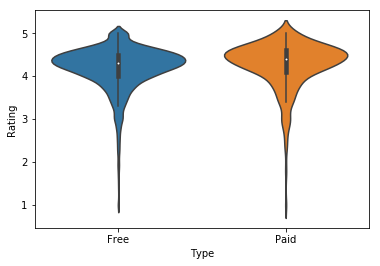

In [173]:
sns.violinplot(x='Type', y='Rating', data=df)

In [174]:
categories = list(df['Category'].unique())
cat_ratings = {}
for x in range(1,33):
    for cat in list(df['Category'].unique()):
        x = df[df['Category'].str.contains(f'{cat}')]['Rating']
        cat_ratings["y_{0}".format(cat)]=x
traces = []       
for xd, yd in zip(categories, cat_ratings.values()):
    traces.append(go.Box(
        boxmean=True,
        y=yd,
        name=xd,
        boxpoints='all',
        jitter=0.5,
        marker=dict(
        size=2),
        whiskerwidth=0.2,
        line=dict(width=1),))
layout = go.Layout(
    title='Rating per App Category',
    yaxis=dict(
        showgrid=True,
        zeroline=True,
        title='Rating',
        rangemode='tozero',),
    xaxis=dict(
        title='App Category',
        zeroline=False),
    showlegend=False)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

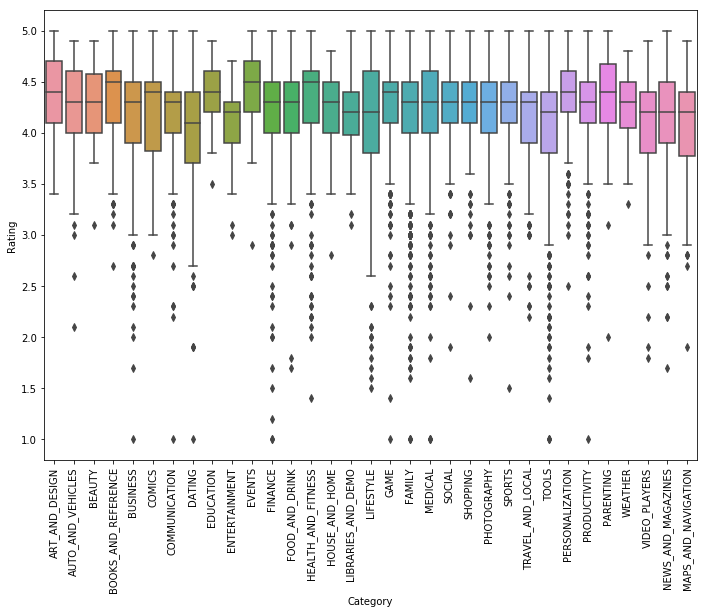

In [175]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax.tick_params(labelsize=10) 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) 
sns.boxplot(x='Category', y='Rating', data=df) 

In [176]:
categories = list(df['Category'].unique())
cat_reviews = {}
for x in range(1,33):
    for cat in list(df['Category'].unique()):
        x = df[df['Category'].str.contains(f'{cat}')]['Reviews']
        cat_reviews["y_{0}".format(cat)]=x
traces = []       
for xd, yd in zip(categories, cat_reviews.values()):
    traces.append(go.Box(
        boxmean=True,
        y=yd,
        name=xd,
        boxpoints='all',
        jitter=0.5,
        marker=dict(
        size=2),
        whiskerwidth=0.2,
        line=dict(width=1),))
layout = go.Layout(
    title='Number of Reviews per App Category',
    yaxis=dict(
        showgrid=True,
        zeroline=True,
        title='Rating',
        type='log',
        rangemode='tozero',),
    xaxis=dict(
        title='App Category',
        zeroline=False),
    showlegend=False)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

Text(0.5,1,'Number of Apps by Category')

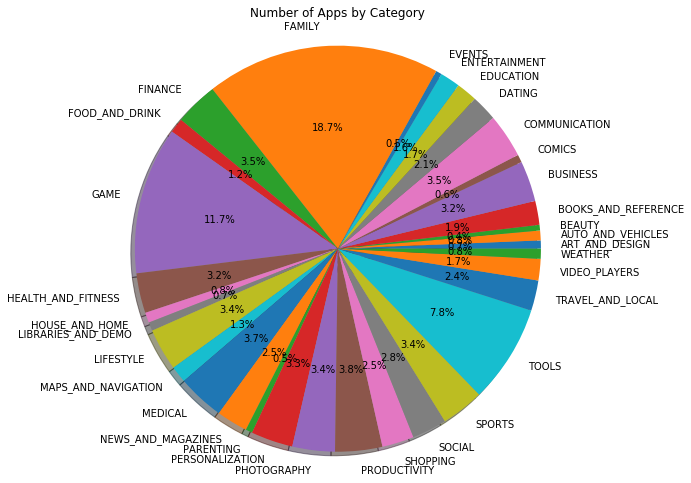

In [177]:
sizes = list(df.groupby('Category').Rating.count().reset_index()['Rating'])
labels= list(df.groupby('Category').Rating.count().reset_index()['Category'])  
fig1, ax1 = plt.subplots()
fig1.set_size_inches(11.7, 8.27)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)

ax1.axis('equal')
plt.title('Number of Apps by Category')

Text(0.5,1,'Top 10 Categories')

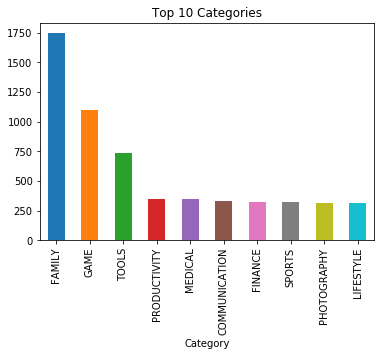

In [178]:
df.groupby('Category').Rating.count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Categories')

In [179]:
Price_category = list(df.groupby('Price').Rating.count().sort_values(ascending=False).head(10).index)

In [180]:
df[df.Category.isin(Price_category)].groupby(['Price', 'Rating']).Rating.count().unstack().plot()
plt.title('Price' )

TypeError: Empty 'DataFrame': no numeric data to plot

Text(0.5,1,'Top 10 Categories')

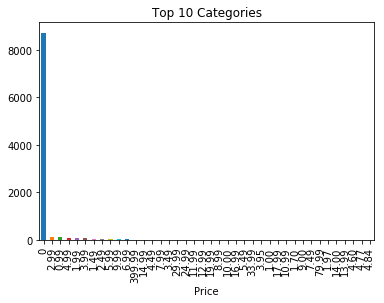

In [181]:
df.groupby('Price').Rating.count().sort_values(ascending=False).head(40).plot(kind='bar')
plt.title('Top 10 Categories')

In [182]:
#Begin examine of free ratings

free_apps_rating = df[df['Type'].str.contains('Free')]['Rating']


In [183]:
free_apps_rating.describe()

count    8715.000000
mean        4.186288
std         0.512335
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

(array([  15.,   17.,   39.,   69.,  125.,  415.,  826., 1591., 3909.,
        1709.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

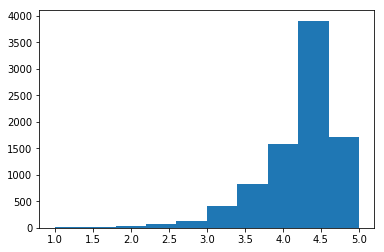

In [188]:
plt.hist(df[df.Type=='Free'].Rating)

(array([ 225.,  455.,  826., 1591., 1914., 1995.,  741.,  446.,  195.,
         327.]), array([  2.71828183,  17.28776956,  31.85725728,  46.42674501,
         60.99623274,  75.56572047,  90.13520819, 104.70469592,
        119.27418365, 133.84367138, 148.4131591 ]), <a list of 10 Patch objects>)

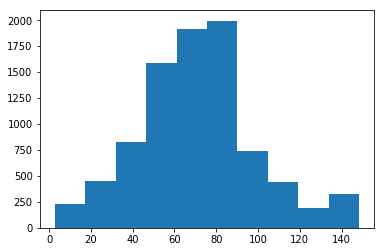

In [189]:
#Normalize Free ratings for T Test

plt.hist(np.exp(df[df.Type=='Free'].Rating))

In [191]:
#Begin examine of Paid ratings
paid_apps_rating = df[df['Type'].str.contains('Paid')]['Rating']

In [192]:
paid_apps_rating.describe()

count    645.000000
mean       4.266822
std        0.548247
min        1.000000
25%        4.100000
50%        4.400000
75%        4.600000
max        5.000000
Name: Rating, dtype: float64

(array([  2.,   1.,   2.,   5.,  12.,  30.,  53.,  69., 263., 208.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

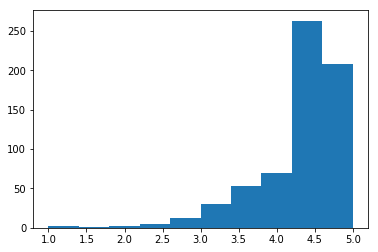

In [194]:
twosample_results = scipy.stats.ttest_ind(paid_apps_rating, free_apps_rating)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Paid_Free Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table')

(array([ 17.,  35.,  53.,  69., 113., 150.,  82.,  53.,  39.,  34.]),
 array([  2.71828183,  17.28776956,  31.85725728,  46.42674501,
         60.99623274,  75.56572047,  90.13520819, 104.70469592,
        119.27418365, 133.84367138, 148.4131591 ]),
 <a list of 10 Patch objects>)

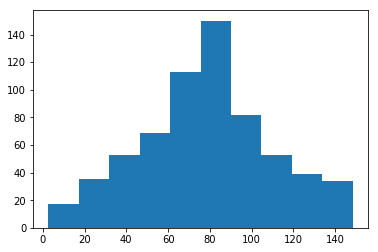

In [195]:
plt.hist(np.exp(df[df.Type=='Paid'].Rating))

In [199]:
paid_apps_rating_norm = (np.exp(df[df['Type'].str.contains('Paid')]['Rating']))
#(np.exp(df[df.Type=='Paid'].Rating))

In [203]:
free_apps_rating_norm = (np.exp(df[df['Type'].str.contains('Free')]['Rating']))

In [204]:
Normalized_twosample_results = scipy.stats.ttest_ind(paid_apps_rating_norm, free_apps_rating_norm)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Paid_Free Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table')

C:\Users\denni\Anaconda3\lib\site-packages\plotly\tools.py:1511: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



In [205]:
#Non normalized Free and Paid data

twosample_results = scipy.stats.ttest_ind(paid_apps_rating, free_apps_rating)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Paid_Free Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table')

C:\Users\denni\Anaconda3\lib\site-packages\plotly\tools.py:1511: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



In [198]:
(np.exp(df[df.Type=='Paid'].Rating), np.exp(df[df.Type!='Paid'].Rating))

(234      109.947172
 235      121.510418
 290      109.947172
 291      121.510418
 427       54.598150
 476       66.686331
 477       13.463738
 481       33.115452
 571       66.686331
 851      134.289780
 852      109.947172
 853      109.947172
 854      109.947172
 995       99.484316
 1001      99.484316
 1227      99.484316
 1228      60.340288
 1327      81.450869
 1335      99.484316
 1341     121.510418
 1347      81.450869
 1831      81.450869
 1832      99.484316
 1833     134.289780
 1834      81.450869
 1835      90.017131
 1836      99.484316
 1837      66.686331
 1838      90.017131
 1839      99.484316
             ...    
 10052     16.444647
 10060    109.947172
 10066     40.447304
 10072     90.017131
 10073     66.686331
 10122     81.450869
 10270     90.017131
 10442    121.510418
 10446     40.447304
 10448     40.447304
 10450     90.017131
 10453     90.017131
 10457     99.484316
 10459    109.947172
 10460     90.017131
 10531    121.510418
 10540     54

In [206]:
twosample_results = scipy.stats.ttest_ind(paid_apps_rating, free_apps_rating)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Paid_Free Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table')

C:\Users\denni\Anaconda3\lib\site-packages\plotly\tools.py:1511: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



In [207]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Year,Last_Updated_Month,Last_Updated_Month_Num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018,January,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018,January,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018,August,12
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018,June,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018,June,6


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 16 columns):
App                       9360 non-null object
Category                  9360 non-null object
Rating                    9360 non-null float64
Reviews                   9360 non-null int64
Size                      9104 non-null float64
Installs                  9360 non-null object
Type                      9360 non-null object
Price                     9360 non-null object
Content Rating            9360 non-null object
Genres                    9360 non-null object
Last Updated              9360 non-null object
Current Ver               9360 non-null object
Android Ver               9360 non-null object
Last_Updated_Year         9360 non-null object
Last_Updated_Month        9360 non-null object
Last_Updated_Month_Num    9360 non-null int64
dtypes: float64(2), int64(2), object(12)
memory usage: 1.5+ MB


In [246]:
#df2 = data["Installs"].isin([1,000,000])

df2=df[df.Installs.isin(['500,000,000'])]

In [247]:
df2.head(50)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Year,Last_Updated_Month,Last_Updated_Month_Num
342,Viber Messenger,COMMUNICATION,4.3,11334799,0.0,"500,000,000",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device,2018,July,7
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000000.0,"500,000,000",Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up,2018,June,6
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,0.0,"500,000,000",Free,0,Everyone,Communication,"July 31, 2018",37.1.206017801.DR37_RC14,4.4 and up,2018,July,7
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000000.0,"500,000,000",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up,2018,August,12
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000000.0,"500,000,000",Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up,2018,June,6
385,Viber Messenger,COMMUNICATION,4.3,11334973,0.0,"500,000,000",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device,2018,July,7
403,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,0.0,"500,000,000",Free,0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device,2018,July,7
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40000000.0,"500,000,000",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up,2018,August,12
431,Viber Messenger,COMMUNICATION,4.3,11334973,0.0,"500,000,000",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device,2018,July,7
465,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000000.0,"500,000,000",Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up,2018,June,6


In [248]:
df2.describe()


,Rating,Reviews,Size,Last_Updated_Month_Num
count,72.000000,7.200000e+01,7.200000e+01,72.000000
mean,4.350000,9.957384e+06,1.995833e+07,8.402778
std,0.151053,7.912736e+06,2.832032e+07,2.537936
min,4.000000,2.824600e+05,0.000000e+00,5.000000
25%,4.300000,2.084126e+06,0.000000e+00,7.000000
50%,4.300000,8.357559e+06,0.000000e+00,7.000000
75%,4.425000,1.488673e+07,4.000000e+07,12.000000
max,4.700000,4.291653e+07,7.400000e+07,12.000000


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

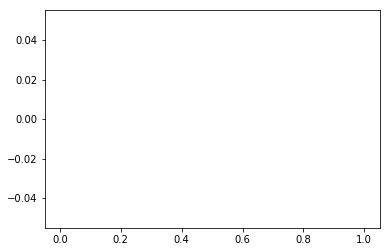

In [255]:
plt.hist(df2[df2.Type=='Installs'], bins = 10)

TypeError: 4.3 is not a string

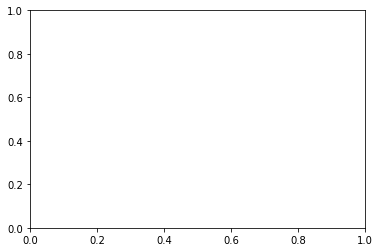

In [258]:
plt.hist(df2, bins =10)

TypeError: 4.3 is not a string

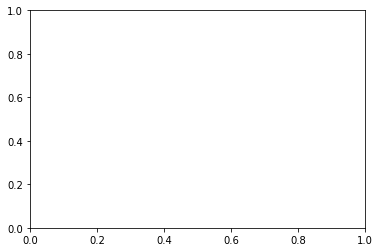

In [257]:
plt.hist(df2)
plt.title("Installs vs ratings")
plt.xlabel("Rating")
plt.ylabel("Install")
plt.show()